## I. Introduction

Name    : Theo Nugraha

Batch   : RMT-021

Deployment Link : [HUGGING FACE - deployment](https://huggingface.co/spaces/nugrahatheo/deployment)

### I.I. Project Background

I am a Data Scientist who has a client at the largest hospital in San Francisco. I was asked to create a model to predict whether a patient will die or not using the dataset provided by the hospital. The hospital asked me to create a model with the Random Forest Classifier algorithm and one of the boosting algorithms using the dataset provided by the hospital.

### I.II. About Dataset

**QUERY**
```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_021_rmt.heart-failure`;
```

This dataset contains features:
- `age` = Age
- `anaemia` = Decrease of red blood cells or hemoglobin.
- `creatinine_phosphokinase` = Level of the CPK enzyme in the blood (mcg/L).
- `diabetes` = If the patients has diabetes.
- `ejection_fraction` = Percentage of blood leaving the heart at each contraction (percentage).
- `high_blood_pressure` = If the patients has hypertention.
- `platelets` = Platelets in the blood (kiloplatelets/mL).
- `serum_creatinine` = Level of serum creatinine in the blood (mg/dL).
- `serum_sodium` = Level of serum sodium in the blood (mEq/L).
- `sex` = Woman or man.
- `smoking` = If the patient smokes or not.
- `time` = Follow-up period (days).
- `DEATH_EVENT` = If the patient decreased during the follow-up period.

### I.III. Objective

This project aims to create a model with Random Forest Classifier and GradientBoost Classifier algorithms to predict whether a patient will die or not.

## II. Import Library

In [4]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

## III. Data Loading

In [5]:
# Data Loading

df = pd.read_csv('h8dsft_P1G3_theo.csv')
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    42.0        1                       250         1                 15   
1    46.0        0                       168         1                 17   
2    65.0        1                       160         1                 20   
3    53.0        1                        91         0                 20   
4    50.0        1                       582         1                 20   
..    ...      ...                       ...       ...                ...   
294  63.0        1                       122         1                 60   
295  45.0        0                       308         1                 60   
296  70.0        0                        97         0                 60   
297  53.0        1                       446         0                 60   
298  50.0        0                       582         0                 62   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      0  213000.00               1.3           136    0   
1                      1  271000.00               2.1           124    0   
2                      0  327000.00               2.7           116    0   
3                      1  418000.00               1.4           139    0   
4                      1  279000.00               1.0           134    0   
..                   ...        ...               ...           ...  ...   
294                    0  267000.00               1.2           145    1   
295                    1  377000.00               1.0           136    1   
296                    1  220000.00               0.9           138    1   
297                    1  263358.03               1.0           139    1   
298                    1  147000.00               0.8           140    1   

     smoking  time  DEATH_EVENT  
0          0    65            1  
1          0   100            1  
2          0     8            1  
3          0    43            1  
4          0   186            0  
..       ...   ...          ...  
294        0   147            0  
295        0   186            0  
296        0   186            0  
297        0   215            0  
298        1   192            0  

[299 rows x 13 columns]

This dataset has 13 columns or features and 299 rows of data.

In [3]:
# Displays the top 10 data

df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   
3  53.0        1                        91         0                 20   
4  50.0        1                       582         1                 20   
5  70.0        1                       125         0                 25   
6  65.0        1                        52         0                 25   
7  70.0        0                       161         0                 25   
8  60.0        1                        76         1                 25   
9  59.0        1                       280         1                 25   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   
3                    1   418000.0               1.4           139    0   
4                    1   279000.0               1.0           134    0   
5                    1   237000.0               1.0           140    0   
6                    1   276000.0               1.3           137    0   
7                    0   244000.0               1.2           142    0   
8                    0   196000.0               2.5           132    0   
9                    1   302000.0               1.0           141    0   

   smoking  time  DEATH_EVENT  
0        0    65            1  
1        0   100            1  
2        0     8            1  
3        0    43            1  
4        0   186            0  
5        0    15            1  
6        0    16            0  
7        0    66            1  
8        0    77            1  
9        0    78            1

In [4]:
# Display the bottom 10 data

df.tail(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
289  64.0        0                      1610         0                 60   
290  62.0        0                        30         1                 60   
291  53.0        0                       196         0                 60   
292  70.0        1                       171         0                 60   
293  60.0        1                        95         0                 60   
294  63.0        1                       122         1                 60   
295  45.0        0                       308         1                 60   
296  70.0        0                        97         0                 60   
297  53.0        1                       446         0                 60   
298  50.0        0                       582         0                 62   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
289                    0  242000.00               1.0           137    1   
290                    1  244000.00               0.9           139    1   
291                    0  220000.00               0.7           133    1   
292                    1  176000.00               1.1           145    1   
293                    0  337000.00               1.0           138    1   
294                    0  267000.00               1.2           145    1   
295                    1  377000.00               1.0           136    1   
296                    1  220000.00               0.9           138    1   
297                    1  263358.03               1.0           139    1   
298                    1  147000.00               0.8           140    1   

     smoking  time  DEATH_EVENT  
289        0   113            0  
290        0   117            0  
291        1   134            0  
292        1   146            0  
293        1   146            0  
294        0   147            0  
295        0   186            0  
296        0   186            0  
297        0   215            0  
298        1   192            0

In [5]:
# Duplicate Dataset

data_backup = df.copy()

In [6]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In this dataset, there are 13 columns with 10 columns of integer data type and 3 columns of float data type.

In [7]:
# Check Missing Value

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no missing value in this dataset.

In [8]:
# Duplication Check 

df.duplicated().sum()

0

There in no duplicate value in this dataset.

In [7]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (299, 13)

Col :  age
Length Unique Value :  47

Col :  anaemia
Length Unique Value :  2

Col :  creatinine_phosphokinase
Length Unique Value :  208

Col :  diabetes
Length Unique Value :  2

Col :  ejection_fraction
Length Unique Value :  17

Col :  high_blood_pressure
Length Unique Value :  2

Col :  platelets
Length Unique Value :  176

Col :  serum_creatinine
Length Unique Value :  40

Col :  serum_sodium
Length Unique Value :  27

Col :  sex
Length Unique Value :  2

Col :  smoking
Length Unique Value :  2

Col :  time
Length Unique Value :  148

Col :  DEATH_EVENT
Length Unique Value :  2



In [6]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].unique())
  print('')

Shape of Dataset :  (299, 13)

Col :  age
Length Unique Value :  [42.    46.    65.    53.    50.    70.    60.    59.    72.    49.
 75.    57.    48.    62.    52.    55.    58.    86.    66.    80.
 45.    67.    90.    95.    63.    61.    60.667 40.    73.    51.
 82.    43.    85.    64.    68.    54.    69.    47.    44.    81.
 87.    94.    56.    41.    78.    77.    79.   ]

Col :  anaemia
Length Unique Value :  [1 0]

Col :  creatinine_phosphokinase
Length Unique Value :  [ 250  168  160   91  582  125   52  161   76  280  156 1896   56  211
   80  128  159  124  129  328  482  167  131  166 2522 1051  249  281
  291  335   58 2334  835  972   81  572   88  618  892  235  260  144
   68   96  776  326  213   84  337 1820  112  318   69   61  400  719
  151  101 2281  720 1185  207  655  336  233  244  855   53  358 1202
  615  588   92   59  143  102  113  200   62  675  157 2060 3964  427
  246  212  146  111  553  789  364   47   66  115 1199  231 1380  577
 7702  110  15

Based on the cardinality check, there is no problems.

Based on the info from the source dataset, we can know that there are features that need to be converted to categorical:

1. `anaemia`
2. `diabetes`
3. `high_blood_pressure`
4. `sex`
5. `smoker`
6. `DEATH_EVENT`

## IV. Exploratory Data Analysis (EDA) - NOT YET

In [11]:
# Check Basic Statistic

df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

Based on the basic statistics check above, we can know that:
- Based on the distribution, almost all features appear to be fairly symmetrical. This is because the mean and median (50th percentile) values are close together.

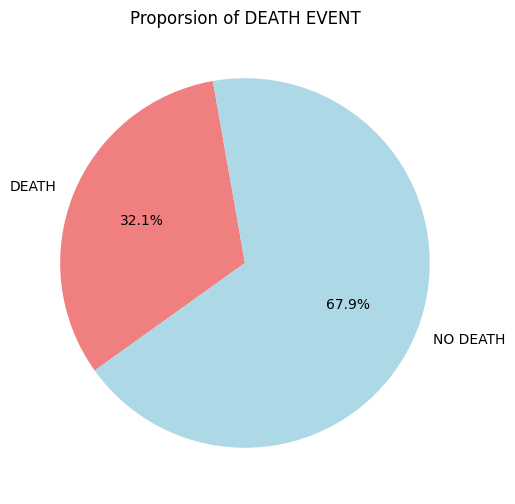

In [12]:
# Pie chart `DEATH_EVENT`
yes = df['DEATH_EVENT'][df['DEATH_EVENT'] == 1].count()
no  = df['DEATH_EVENT'][df['DEATH_EVENT'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([yes,no], labels=['DEATH', 'NO DEATH'], autopct="%1.1f%%", startangle=100, colors=["lightcoral","lightblue"])
plt.title("Proporsion of DEATH EVENT")
plt.show()

Based on the diagram above, we can understand that the surviving patients outnumber the deceased patients. It also shows that the proportion of the two classes is not balanced.

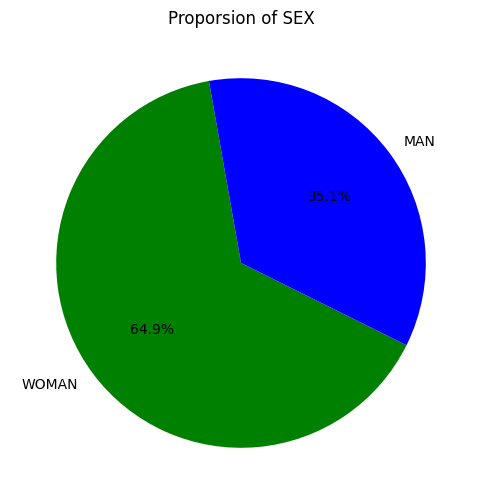

In [13]:
# Pie chart `sex`
woman = df['sex'][df['sex'] == 1].count()
man   = df['sex'][df['sex'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([woman,man], labels=['WOMAN', 'MAN'], autopct="%1.1f%%", startangle=100, colors=["green","blue"])
plt.title("Proporsion of SEX")
plt.show()

Based on the diagram above, we can understand that the woman patients outnumber the man patients. It also shows that the proportion of the two classes is not balanced.

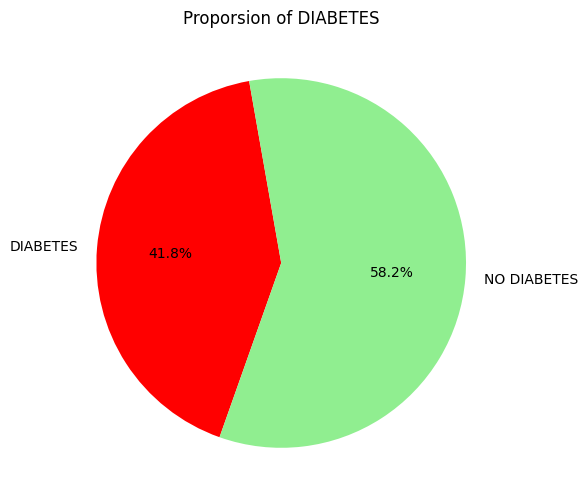

In [14]:
# Pie chart `diabetes`
diabetes      = df['diabetes'][df['diabetes'] == 1].count()
no_diabetes   = df['diabetes'][df['diabetes'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([diabetes,no_diabetes], labels=['DIABETES', 'NO DIABETES'], autopct="%1.1f%%", startangle=100, colors=["red","lightgreen"])
plt.title("Proporsion of DIABETES")
plt.show()

Based on the diagram above, we can know that patients who do not have diabetes are more than patients who have diabetes.

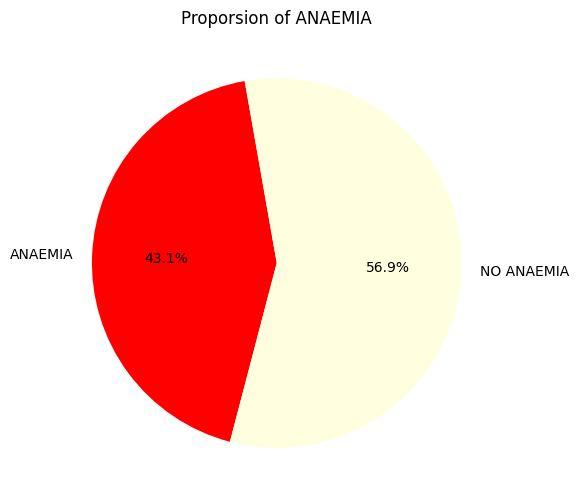

In [15]:
# Pie chart `anaemia`
anaemia      = df['anaemia'][df['anaemia'] == 1].count()
no_anaemia   = df['anaemia'][df['anaemia'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([anaemia,no_anaemia], labels=['ANAEMIA', 'NO ANAEMIA'], autopct="%1.1f%%", startangle=100, colors=["red","lightyellow"])
plt.title("Proporsion of ANAEMIA")
plt.show()

Based on the diagram above, we can know that patients who do not have anaemia are more than patients who have anaemia.

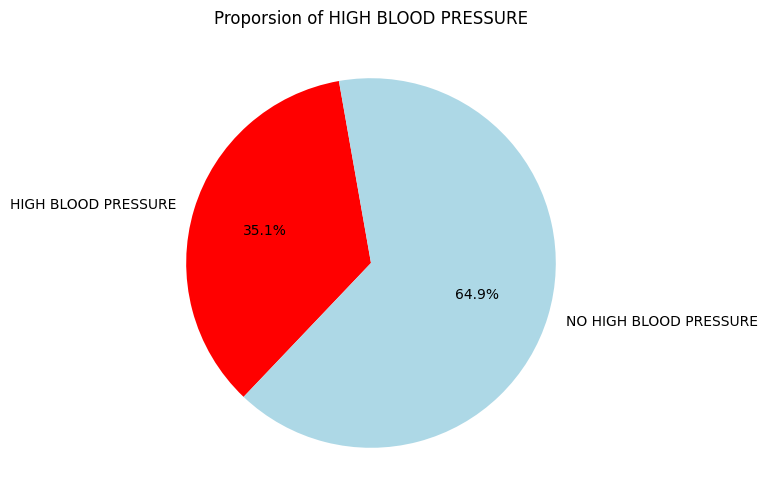

In [16]:
# Pie chart `high_blood_pressure`
high_blood_pressure      = df['high_blood_pressure'][df['high_blood_pressure'] == 1].count()
no_high_blood_pressure   = df['high_blood_pressure'][df['high_blood_pressure'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([high_blood_pressure,no_high_blood_pressure], labels=['HIGH BLOOD PRESSURE', 'NO HIGH BLOOD PRESSURE'], autopct="%1.1f%%", startangle=100, colors=["red","lightblue"])
plt.title("Proporsion of HIGH BLOOD PRESSURE")
plt.show()

Based on the diagram above, we can know that patients who do not have high blood pressure are more than patients who have high blood pressure.

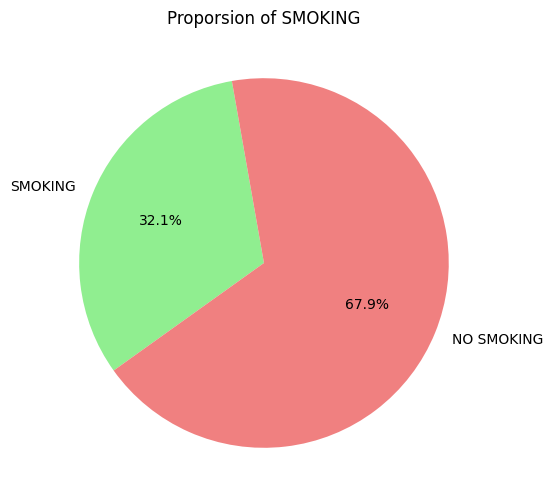

In [17]:
# Pie chart `smoking`
smoking      = df['smoking'][df['smoking'] == 1].count()
no_smoking   = df['smoking'][df['smoking'] == 0].count()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie([smoking,no_smoking], labels=['SMOKING', 'NO SMOKING'], autopct="%1.1f%%", startangle=100, colors=["lightgreen","lightcoral"])
plt.title("Proporsion of SMOKING")
plt.show()

Based on the diagram above, we can know that patients who do not smoke are more than patients who smoke.

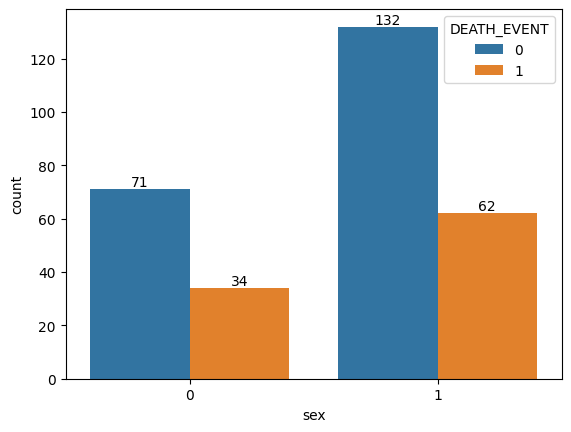

In [8]:
# Count Plot `DEATH_EVENT` based on `sex`

death = sns.countplot(data=df, x="sex", hue="DEATH_EVENT")

for container in death.containers:
    death.bar_label(container)

plt.show()

Based on the diagram above, we can see that more man patients die than woman patients.

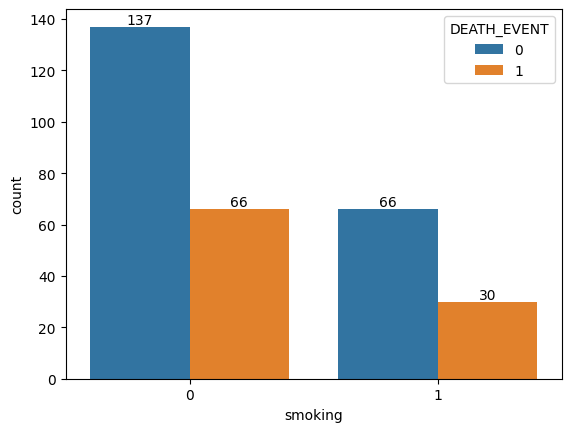

In [9]:
# Count Plot `DEATH_EVENT` based on `smoking`

death_smoke = sns.countplot(data=df, x="smoking", hue="DEATH_EVENT")

for container in death_smoke.containers:
    death_smoke.bar_label(container)

plt.show()

Based on the diagram above, we can see that the number of patients who do not smoke and die is equal to the number of patients who smoke and do not die.

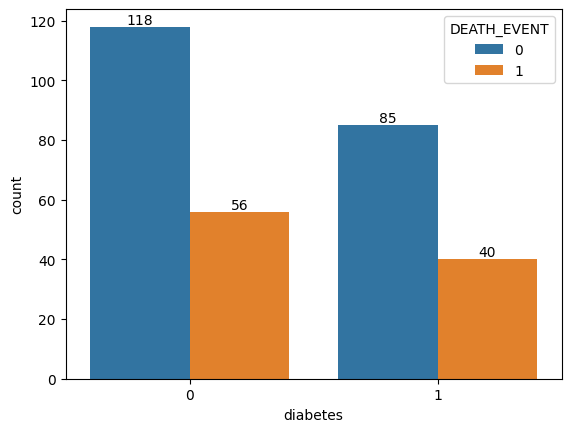

In [10]:
# Count Plot `DEATH_EVENT` based on `diabetes`

death_diabetes = sns.countplot(data=df, x="diabetes", hue="DEATH_EVENT")

for container in death_diabetes.containers:
    death_diabetes.bar_label(container)

plt.show()

Based on the diagram above, we can see that patients who do not die with non-diabetics are more than patients who die with diabetes.

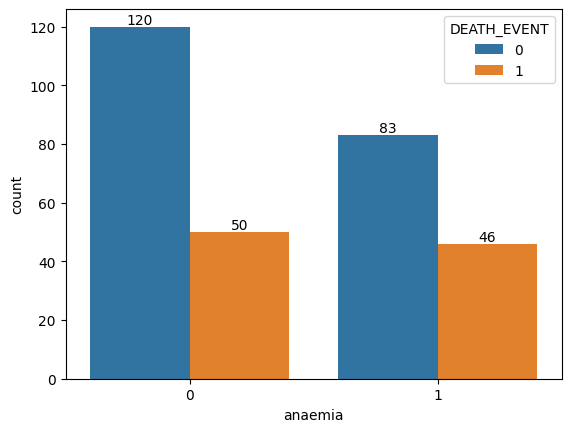

In [11]:
# Count Plot `DEATH_EVENT` based on `anaemia`

death_anaemia = sns.countplot(data=df, x="anaemia", hue="DEATH_EVENT")

for container in death_anaemia.containers:
    death_anaemia.bar_label(container)

plt.show()

Based on the diagram above, we can see that patients who do not die with non-anaemia are more than patients who die with anaemia.

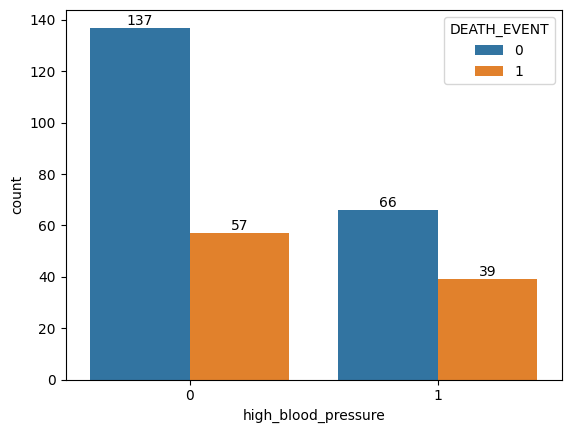

In [12]:
# Count Plot `DEATH_EVENT` based on `high_blood_pressure`

death_hbp = sns.countplot(data=df, x="high_blood_pressure", hue="DEATH_EVENT")

for container in death_hbp.containers:
    death_hbp.bar_label(container)

plt.show()

Based on the diagram above, we can see that patients who do not die with non-high blood pressure are more than patients who die with high blood pressure.

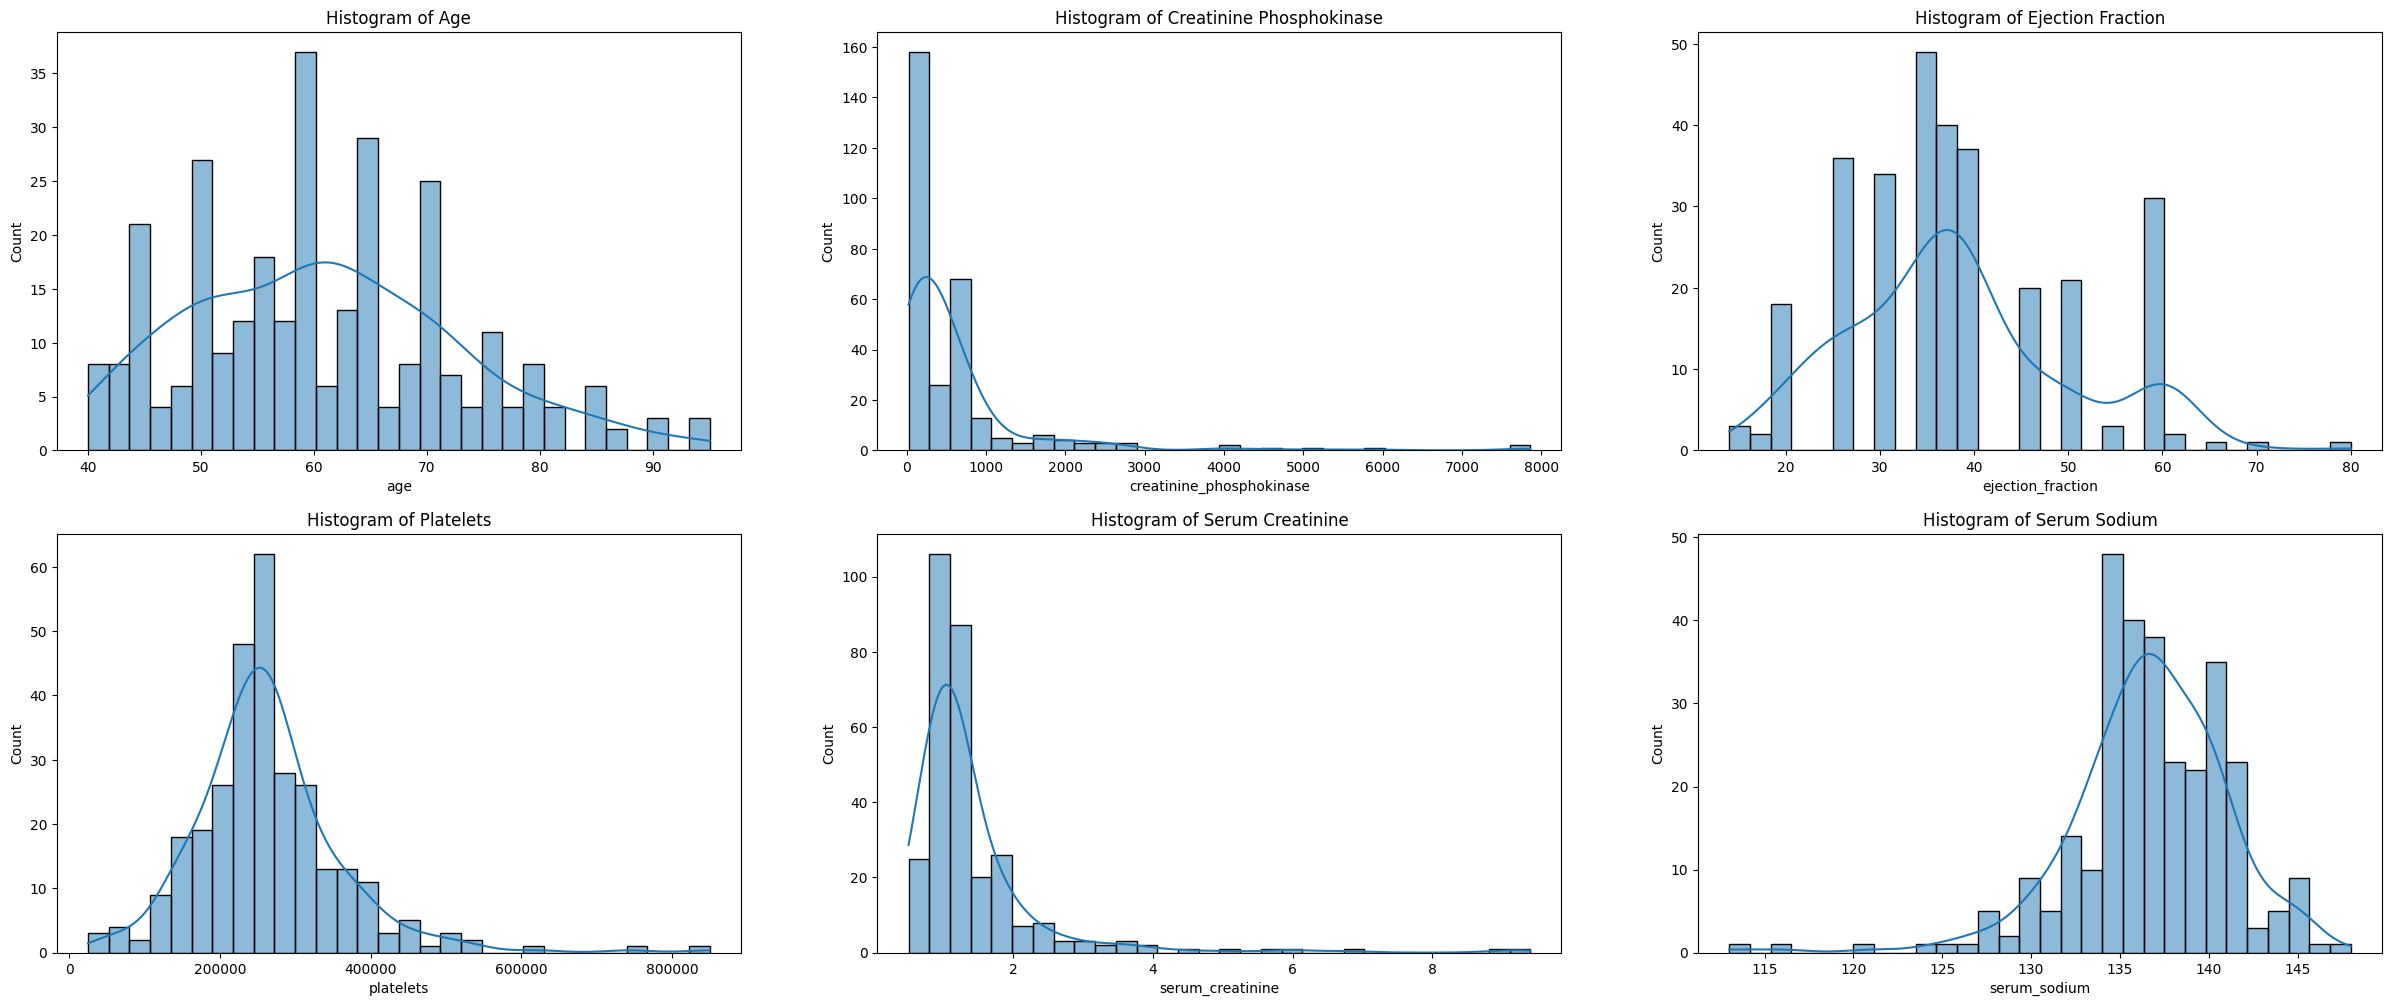

In [13]:
# Create Histogram

plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.histplot(df['age'], kde=True, bins = 30)
plt.title('Histogram of Age')

plt.subplot(4,3,2)
sns.histplot(df['creatinine_phosphokinase'], kde=True, bins = 30)
plt.title('Histogram of Creatinine Phosphokinase')

plt.subplot(4,3,3)
sns.histplot(df['ejection_fraction'], kde=True, bins = 30)
plt.title('Histogram of Ejection Fraction')

plt.subplot(4,3,4)
sns.histplot(df['platelets'], kde=True, bins = 30)
plt.title('Histogram of Platelets')

plt.subplot(4,3,5)
sns.histplot(df['serum_creatinine'], kde=True, bins = 30)
plt.title('Histogram of Serum Creatinine')

plt.subplot(4,3,6)
sns.histplot(df['serum_sodium'], kde=True, bins = 30)
plt.title('Histogram of Serum Sodium')

plt.show;

In [15]:
# Check Skewness 

print('FEATURES SKEWNESS')
print('-----------------')
print('')
print('Skewness Age                         : ',df['age'].skew())
print('Skewness Creatinine Phosphokinase    : ',df['creatinine_phosphokinase'].skew())
print('Skewness Ejection Fraction           : ',df['ejection_fraction'].skew())
print('Skewness Platelets                   : ',df['platelets'].skew())
print('Skewness Serum Creatinine            : ',df['serum_creatinine'].skew())
print('Skewness Serum Sodium                : ',df['serum_sodium'].skew())

FEATURES SKEWNESS
-----------------

Skewness Age                         :  0.4230619067286355
Skewness Creatinine Phosphokinase    :  4.463110084653752
Skewness Ejection Fraction           :  0.5553827516973213
Skewness Platelets                   :  1.462320838275779
Skewness Serum Creatinine            :  4.455995882049029
Skewness Serum Sodium                :  -1.0481360160574988


Based on the histogram and skewness level, we can tell that the data tends to be not normally distributed in the features `creatinine_phosphokinase`, `platelets`, `serum_creatinine` and `serum_sodium`. In `age` and `ejection_fraction` features, the data tends to be normally distributed.

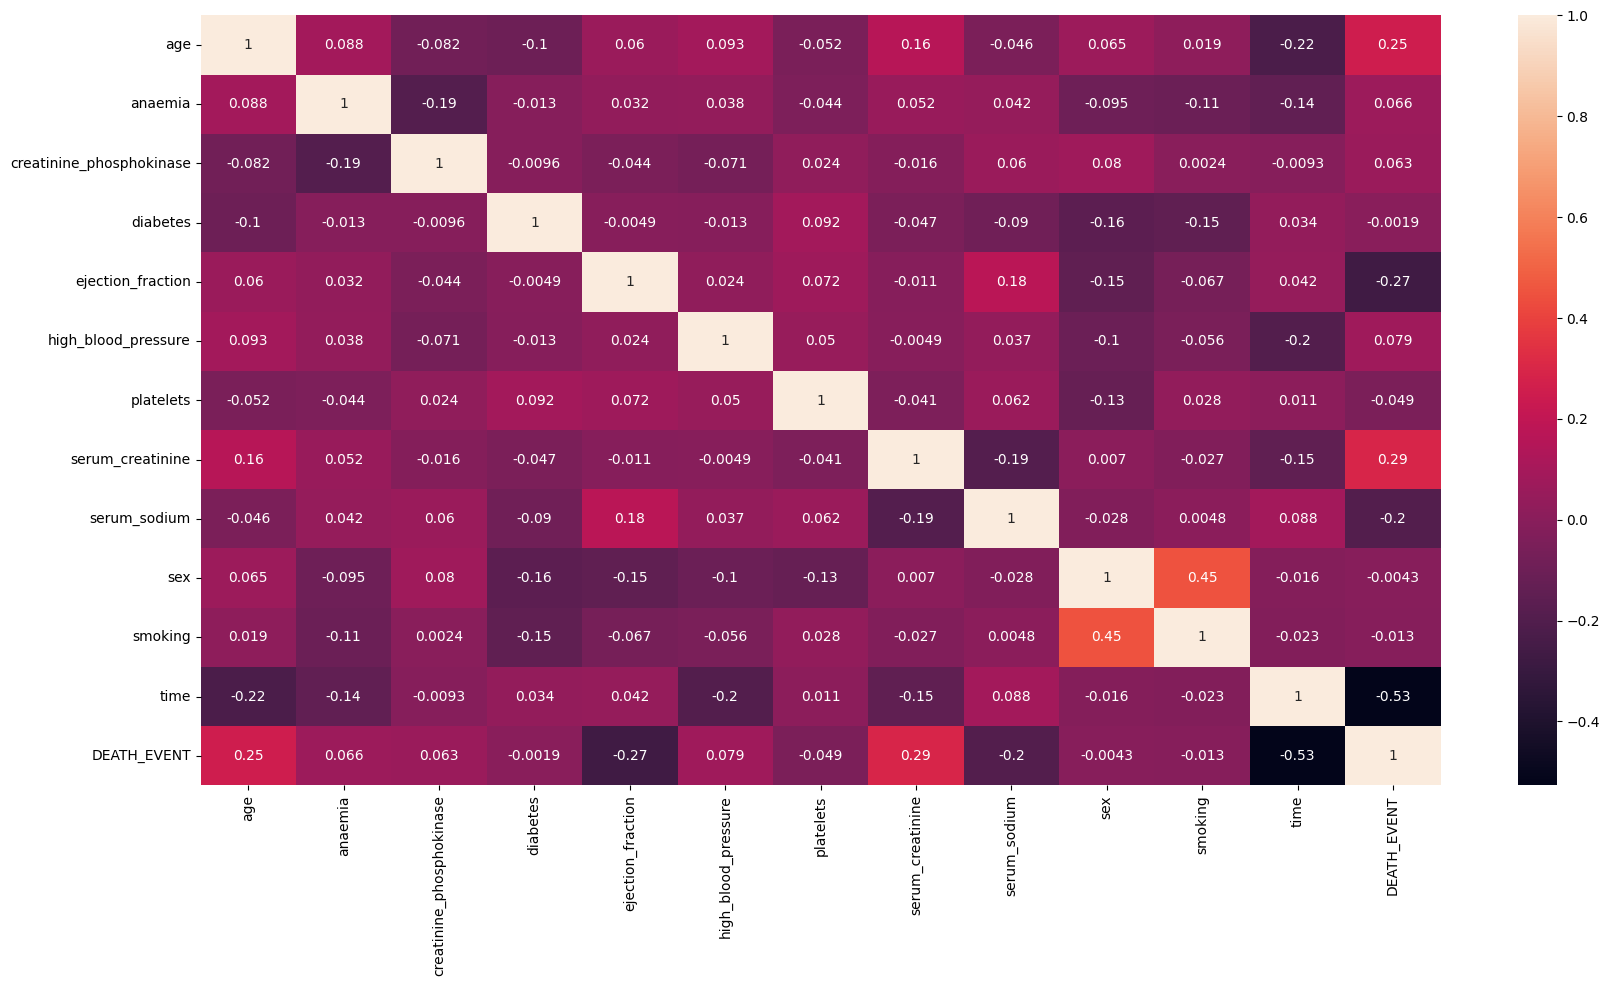

In [18]:
# Correlation feature checking

fig,ax = plt.subplots(figsize=[20,10])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Based on the correlation test of all features against the `DEATH_EVENT` feature using the `pearson` method, we can conclude that :

1. There is a positive correlation between the `DEATH_EVENT` feature and the feature:
- `age` of 0.25, which means a strong positive correlation.
- `anaemia` of 0.066, which means a weak positive correlation.
- `creatinine_phosphokinase` of 0.063, which means a weak positive correlation.
- `high_blood_pressure` of 0.079, which means a weak positive correlation.
- `serum_creatinine` of 0.29, which means a strong positive correlation.

2. There is a negative correlation between the feature `DEATH_EVENT` and the feature:
- `diabetes` of -0.0019, which means a weak negative correlation.
- `ejection_fraction` of -0.27, which means a strong negative correlation.
- `platelets` of -0.049, which means a weak negative correlation.
- `serum_sodium` of -0.2, which means a strong negative correlation.
- `sex` of -0.0043, which means a weak negative correlation.
- `smoking` of -0.013, which means a weak negative correlation.
- `time` of -0.53, which means a strong negative correlation.

## V. Feature Engineering

### V.I. Split between X (Features) and y (Target)

In [20]:
# Splitting between X and y

X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X.head(3)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   

   smoking  time  
0        0    65  
1        0   100  
2        0     8

In [21]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(299, 12)
(299,)


### V.II. Feature Selection

In this feature selection, I will use all features that have strong correlation base on correlation checking above

In [22]:
# Remove feature 

X.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 
        'smoking'], axis=1, inplace=True)

X

age  ejection_fraction  serum_creatinine  serum_sodium  time
0    42.0                 15               1.3           136    65
1    46.0                 17               2.1           124   100
2    65.0                 20               2.7           116     8
3    53.0                 20               1.4           139    43
4    50.0                 20               1.0           134   186
..    ...                ...               ...           ...   ...
294  63.0                 60               1.2           145   147
295  45.0                 60               1.0           136   186
296  70.0                 60               0.9           138   186
297  53.0                 60               1.0           139   215
298  50.0                 62               0.8           140   192

[299 rows x 5 columns]

### V.III. Split between Train-set and Test-set

I will divide the data into 2, namely data for train and data for test. In this case, I will use an 80/20 ratio with 80% being the data for train and 20% being the data for test.

In [23]:
# Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train.head(3)

Train size :  (239, 5)
Test size :  (60, 5)


age  ejection_fraction  serum_creatinine  serum_sodium  time
205  55.0                 38               1.1           136     6
91   70.0                 60               1.3           137    90
281  60.0                 60               1.1           131    10

### V.IV. Handling Outlier

In this section, we will check for outliers in the numeric features/columns.

In [24]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.III.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

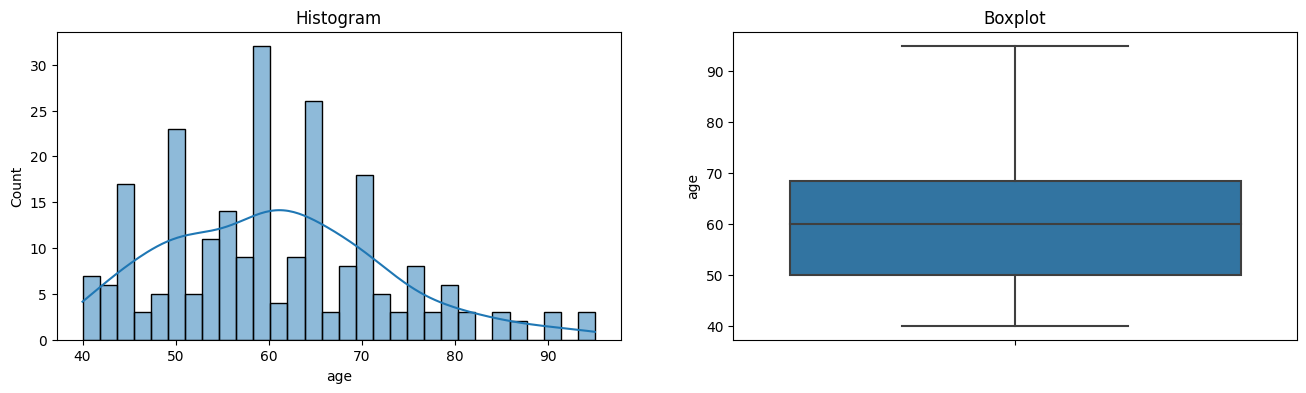


Skewness Value :  0.4830635489937634


In [25]:
# Set value histogram & boxplot and show skewness from feature `Age`

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

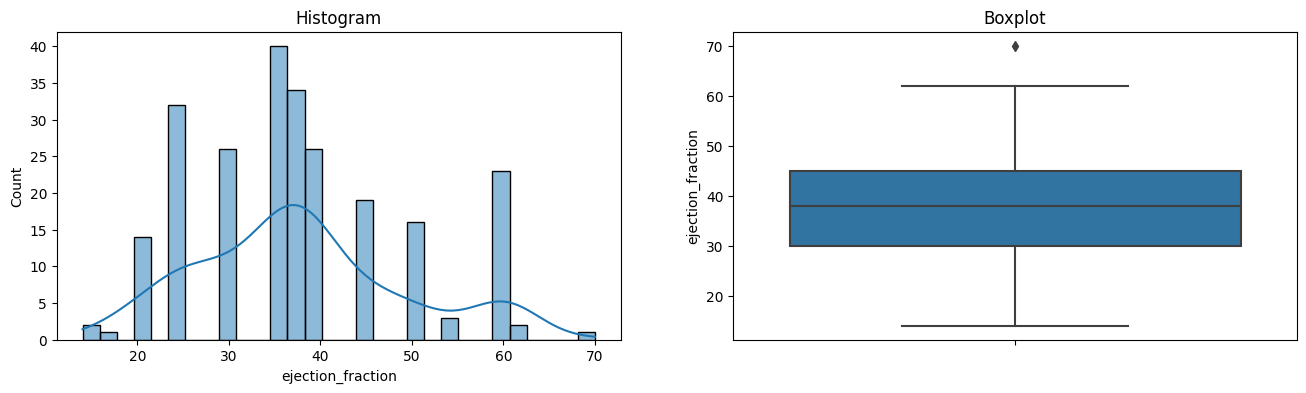


Skewness Value :  0.49071073234719453


In [26]:
# Set value histogram & boxplot and show skewness from feature `ejection_fraction`

diagnostic_plots(X_train, 'ejection_fraction')
print('\nSkewness Value : ', X_train['ejection_fraction'].skew())

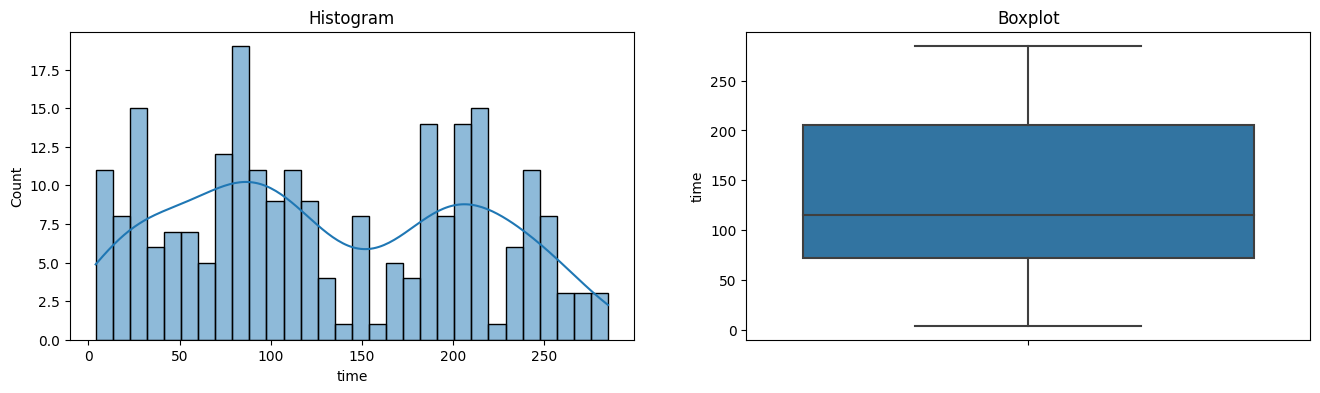


Skewness Value :  0.13409512756629116


In [27]:
# Set value histogram & boxplot and show skewness from feature `time`

diagnostic_plots(X_train, 'time')
print('\nSkewness Value : ', X_train['time'].skew())

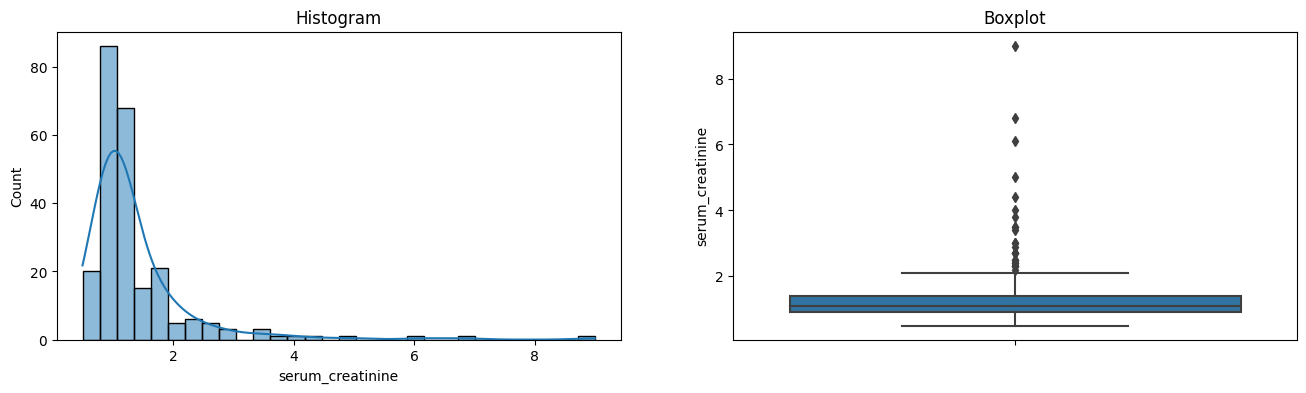


Skewness Value :  4.186283446552417


In [28]:
# Set value histogram & boxplot and show skewness from feature `serum_creatinine`

diagnostic_plots(X_train, 'serum_creatinine')
print('\nSkewness Value : ', X_train['serum_creatinine'].skew())

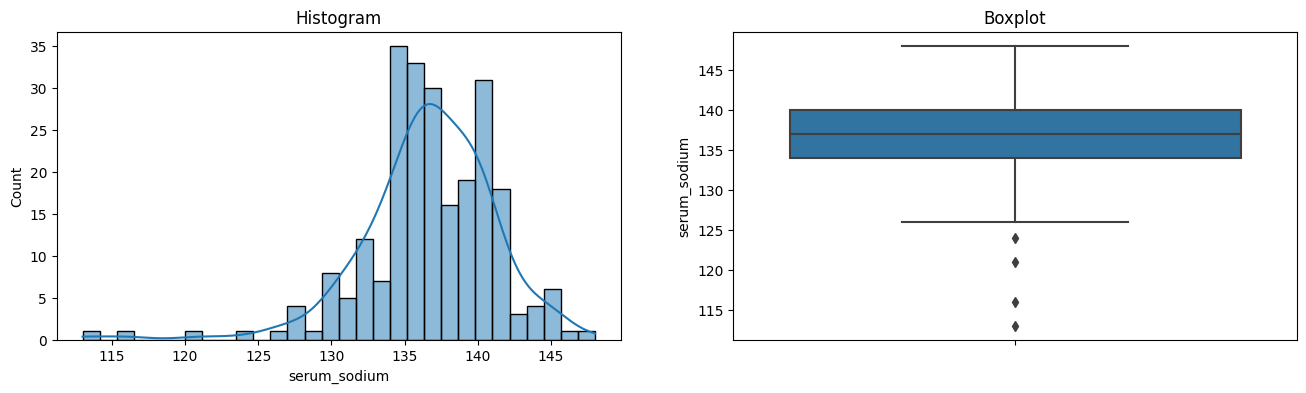


Skewness Value :  -1.20374269292244


In [29]:
# Set value histogram & boxplot and show skewness from feature `serum_sodium`

diagnostic_plots(X_train, 'serum_sodium')
print('\nSkewness Value : ', X_train['serum_sodium'].skew())

Based on the histogram, boxplot and skewness level, we can know that : 
- There are outliers in `ejection_fraction`, `serum_creatinine` and `serum_sodium` features.
- In the feature `age` and `time` the data distribution tends to be normal.
- In the features `ejection_fraction` and `serum_creatinine` the data distribution has positive skewness if the tail of the distribution lies longer towards the right. This means that the distribution has higher values on the left with a long tail towards the right. Extreme values tend to be higher on the right. The graph of a distribution with positive skewness will look skewed to the left. A distribution with positive skewness may indicate that the data has many low values.
- In the `serum_sodium` feature, the distribution has negative skewness if the tail of the distribution lies longer towards the left. This means that the distribution has higher values on the right with a long tail towards the left. Extreme values tend to be lower on the left. The graph of a distribution with negative skewness will look skewed to the right. A distribution with negative skewness may indicate that the data has many high values.

#### V.III.II. Outlier Detection

##### V.III.II.I. Outlier Detection from `ejection_fraction`

In [30]:
# Make function to detection outlier on `ejection_fraction` feature

def find_skewed_boundaries_ef(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_ef = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_ef = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_ef, lower_boundary_ef

In [31]:
# Show upper & lower boundary from `ejection_fraction` feature

upper_boundary_ef, lower_boundary_ef = find_skewed_boundaries_ef(X_train, 'ejection_fraction', 1.5)
upper_boundary_ef, lower_boundary_ef

(67.5, 7.5)

In [32]:
# Store outliers in a variable

outliers_ef = X_train['ejection_fraction'][(X_train['ejection_fraction'] < lower_boundary_ef) | (X_train['ejection_fraction'] > upper_boundary_ef)]

In [33]:
# Show the number and percentage of outliers for `ejection_fraction`

print('Total Ejection Fraction                                    : ', X_train['ejection_fraction'].count())
print('Ejection Fraction with more than 67.5 and less than 7.5    : ', outliers_ef.count())
print('% Ejection Fraction with more than 67.5 and less than 7.5  : ', outliers_ef.count() / X_train['ejection_fraction'].count() * 100)

Total Ejection Fraction                                    :  239
Ejection Fraction with more than 67.5 and less than 7.5    :  1
% Ejection Fraction with more than 67.5 and less than 7.5  :  0.41841004184100417


Since the outliers are 0.4%, I will change the outliers value to median because the data distribution looks symetrics.

In [34]:
# Change the outlier's value

mean_ef  = X_train[(X_train['ejection_fraction'] >= lower_boundary_ef) & (X_train['ejection_fraction'] <= upper_boundary_ef)].mean(numeric_only=True)

X_train['ejection_fraction'][(X_train['ejection_fraction'] < lower_boundary_ef) | (X_train['ejection_fraction'] > upper_boundary_ef)] = np.nan

X_train.fillna(mean_ef, inplace=True)

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_2022/156946657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ejection_fraction'][(X_train['ejection_fraction'] < lower_boundary_ef) | (X_train['ejection_fraction'] > upper_boundary_ef)] = np.nan


##### V.III.II.IV. Outlier Detection from `serum_creatinine`

In [35]:
# Make function to detection outlier on `serum_creatinine` feature

def find_skewed_boundaries_sc(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_sc = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_sc = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_sc, lower_boundary_sc

In [36]:
# Show upper & lower boundary from `serum_creatinine` feature

upper_boundary_sc, lower_boundary_sc = find_skewed_boundaries_sc(X_train, 'serum_creatinine', 1.5)
upper_boundary_sc, lower_boundary_sc

(2.1499999999999995, 0.15000000000000024)

In [37]:
# Store outliers in a variable

outliers_sc = X_train['serum_creatinine'][(X_train['serum_creatinine'] < lower_boundary_sc) | (X_train['serum_creatinine'] > upper_boundary_sc)]

In [38]:
# Show the number and percentage of outliers for `serum_creatinine`

print('Total Serum Creatinine                                        : ', X_train['serum_creatinine'].count())
print('Serum Creatinine with higher than 2.15 and lower than 0.15    : ', outliers_sc.count())
print('% Serum Creatinine with higher than 2.15 and lower than 0.15  : ', outliers_sc.count() / X_train['serum_creatinine'].count() * 100)

Total Serum Creatinine                                        :  239
Serum Creatinine with higher than 2.15 and lower than 0.15    :  24
% Serum Creatinine with higher than 2.15 and lower than 0.15  :  10.0418410041841


Since the outliers are 10%, I will change the outliers value to median because the data distribution looks not symetrics.

In [39]:
# Change the outlier's value

median_sc  = X_train[(X_train['serum_creatinine'] >= lower_boundary_sc) & (X_train['serum_creatinine'] <= upper_boundary_sc)].median(numeric_only=True)

X_train['serum_creatinine'][(X_train['serum_creatinine'] < lower_boundary_sc) | (X_train['serum_creatinine'] > upper_boundary_sc)] = np.nan

X_train.fillna(median_sc, inplace=True)

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_2022/127397580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['serum_creatinine'][(X_train['serum_creatinine'] < lower_boundary_sc) | (X_train['serum_creatinine'] > upper_boundary_sc)] = np.nan


##### V.III.II.V. Outlier Detection from `serum_sodium`

In [40]:
# Make function to detection outlier on `serum_sodium` feature

def find_skewed_boundaries_ss(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_ss = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_ss = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_ss, lower_boundary_ss

In [41]:
# Show upper & lower boundary from `serum_sodium` feature

upper_boundary_ss, lower_boundary_ss = find_skewed_boundaries_ss(X_train, 'serum_sodium', 1.5)
upper_boundary_ss, lower_boundary_ss

(149.0, 125.0)

In [42]:
# Store outliers in a variable

outliers_ss = X_train['serum_sodium'][(X_train['serum_sodium'] < lower_boundary_ss) | (X_train['serum_sodium'] > upper_boundary_ss)]

In [43]:
# Show the number and percentage of outliers for `serum_sodium`

print('Total Serum Sodium                                      : ', X_train['serum_sodium'].count())
print('Serum Sodium with higher than 149 and lower than 125    : ', outliers_ss.count())
print('% Serum Sodium with higher than 149 and lower than 125  : ', outliers_ss.count() / X_train['serum_sodium'].count() * 100)

Total Serum Sodium                                      :  239
Serum Sodium with higher than 149 and lower than 125    :  4
% Serum Sodium with higher than 149 and lower than 125  :  1.6736401673640167


Since the outliers are 1.7%, I will change the outliers value to median because the data distribution looks not symetrics.

In [44]:
# Change the outlier's value

median_ss  = X_train[(X_train['serum_sodium'] >= lower_boundary_ss) & (X_train['serum_sodium'] <= upper_boundary_ss)].median(numeric_only=True)

X_train['serum_sodium'][(X_train['serum_sodium'] < lower_boundary_ss) | (X_train['serum_sodium'] > upper_boundary_ss)] = np.nan

X_train.fillna(median_ss, inplace=True)

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_2022/728945182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['serum_sodium'][(X_train['serum_sodium'] < lower_boundary_ss) | (X_train['serum_sodium'] > upper_boundary_ss)] = np.nan


### V.V. Handling Missing Value

Here I will check the missing values of X_train, y_train, X_test and y_test, remove the missing values if any, and then equalize the indexes of X_train, y_train, X_test and y_test.

In [45]:
# Missing Value Checking for X_train

X_train.isna().sum()

age                  0
ejection_fraction    0
serum_creatinine     0
serum_sodium         0
time                 0
dtype: int64

In [46]:
# Missing Value Checking for y_train

y_train.isna().sum()

0

In [47]:
# Missing Value Checking for X_test

X_test.isna().sum()

age                  0
ejection_fraction    0
serum_creatinine     0
serum_sodium         0
time                 0
dtype: int64

In [48]:
# Missing Value Checking for y_test

y_test.isna().sum()

0

### V.VI. Split between Numeric Columns and Category Columns

Since there are no categorical columns or features to process, we will process numerical columns or features only.

In [49]:
# Get Numeric Columns and Categorical Columns

num_columns = X_train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']].columns.tolist()

print('Num Columns : ', num_columns)

Num Columns :  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


In [50]:
# Split train set and test set based on column types

X_train_num = X_train[num_columns]

X_test_num = X_test[num_columns]

X_train_num

age  ejection_fraction  serum_creatinine  serum_sodium  time
205  55.0               38.0               1.1         136.0     6
91   70.0               60.0               1.3         137.0    90
281  60.0               60.0               1.1         131.0    10
13   72.0               25.0               1.2         134.0   207
23   65.0               30.0               0.8         138.0   186
..    ...                ...               ...           ...   ...
71   62.0               40.0               0.7         133.0   233
278  77.0               50.0               1.1         137.0   209
218  85.0               38.0               0.9         136.0   187
223  61.0               38.0               1.2         141.0   237
271  65.0               50.0               1.3         137.0    72

[239 rows x 5 columns]

Columns that are numerical are `age`, `ejection_fraction`,`serum_creatinine`, `serum_sodium` and `time`.

The numerical column will be scaled.

### V.VII. Feature Scalling

In this step, I will use the StandardScaler because the average data distribution is normal. This is evidenced by the distance between the mean and median values.

In [51]:
# Show basic statistic

X_train_num.describe()

age  ejection_fraction  serum_creatinine  serum_sodium  \
count  239.000000         239.000000        239.000000    239.000000   
mean    60.662485          37.655462          1.129038    136.937238   
std     11.902086          11.222679          0.323977      3.806263   
min     40.000000          14.000000          0.500000    126.000000   
25%     50.000000          30.000000          0.900000    135.000000   
50%     60.000000          38.000000          1.100000    137.000000   
75%     68.500000          45.000000          1.200000    140.000000   
max     95.000000          62.000000          2.100000    148.000000   

             time  
count  239.000000  
mean   130.794979  
std     78.886978  
min      4.000000  
25%     71.500000  
50%    115.000000  
75%    205.500000  
max    285.000000

In [52]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[-0.47675416,  0.03076457, -0.08981697, -0.24675261, -1.58526644],
       [ 0.78617403,  1.99519484,  0.52880712,  0.01652361, -0.51821725],
       [-0.0557781 ,  1.99519484, -0.08981697, -1.5631337 , -1.53445458],
       ...,
       [ 2.04910221,  0.03076457, -0.70844106, -0.24675261,  0.7139705 ],
       [ 0.02841712,  0.03076457,  0.21949508,  1.06962849,  1.34911883],
       [ 0.36519797,  1.10227199,  0.52880712,  0.01652361, -0.74687065]])

In [53]:
# Setting and fit PCA

pca = PCA(n_components=0.90)
pca.fit(X_train_num_scaled)

PCA(n_components=0.9)

In [54]:
# Transform PCA

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

X_train_scaled_pca = pca.transform(X_train_num_scaled)
X_test_scaled_pca  = pca.transform(X_test_num_scaled)

X_train_scaled_pca = pd.DataFrame(X_train_scaled_pca)
X_test_scaled_pca  = pd.DataFrame(X_test_scaled_pca)

### V.VIII. Feature Encoding

I will skip this step because we don't process categorical or feature columns in this case.

### V.IX. Concate between Numeric Columns and Categorical Columns

Because we don't combine numeric columns with categorical columns, in this step I will convert the scaling result above into frame data.

In [55]:
X_train_final       = X_train_num_scaled
X_train_final_pca   = X_train_scaled_pca

X_test_final       = X_test_num_scaled
X_test_final_pca   = X_test_scaled_pca

In [56]:
# Create dataframe of X_train_final

X_train_final_df     = pd.DataFrame(X_train_num_scaled, columns = [num_columns])

X_train_final_df_pca = pd.DataFrame(X_train_scaled_pca)

X_train_final_df_pca

0         1         2         3         4
0    0.425030  0.376891  1.320540 -0.385715  0.771341
1    0.067226  1.764834 -0.893146 -0.660211  0.891393
2    0.380161  1.154140  0.233570 -2.252179  1.478679
3    0.954782 -0.868037 -0.741108 -0.023344 -1.247618
4   -0.530426 -0.320212  0.108307  0.123842 -1.339990
..        ...       ...       ...       ...       ...
234 -0.844700 -0.747472 -0.603456 -1.351715 -1.055550
235 -0.242657  0.945589 -1.570347 -0.437462 -0.701418
236  0.343958  0.780038 -0.912938 -0.540611 -1.849274
237 -0.832855 -0.159158 -1.000937  1.075883 -0.368486
238  0.312055  1.133831 -0.234357 -0.302219  0.810487

[239 rows x 5 columns]

## VI. Model Definition

In [57]:
# Training using Random Forest and AdaBoost

rf  = RandomForestClassifier(random_state=50)
gb  = GradientBoostingClassifier(random_state=50)

## VII. Model Training

In [58]:
# Train the Random Forest Classifier model - Not using PCA

rf = rf.fit(X_train_final, y_train)

In [59]:
# Train the AdaBoost Classifier  model - Not using PCA

gb = gb.fit(X_train_final, y_train)

In [60]:
# Train the Random Forest Classifier model - Using PCA

rf_pca = rf.fit(X_train_final_pca, y_train)

In [61]:
# Train the AdaBoost Classifier  model - Using PCA

gb_pca = gb.fit(X_train_final_pca, y_train)

## VIII. Model Evaluation

### VIII.I. Model Evaluation Result Checking

#### VIII.I.I. Without PCA

In [62]:
# Predict Train-set and Test-set on Random Forest Classifier Model

y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf  = rf.predict(X_test_final)

In [63]:
# Classification Report of Random Forest Classifier Model

print('Classification Report of Random Forest Classifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_rf))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_rf))


Classification Report of Random Forest Classifier Model

Train
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       162
           1       0.52      0.43      0.47        77

    accuracy                           0.69       239
   macro avg       0.63      0.62      0.62       239
weighted avg       0.67      0.69      0.68       239


Test
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.58      0.58      0.58        19

    accuracy                           0.73        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.73      0.73      0.73        60



Confusion Matrix 


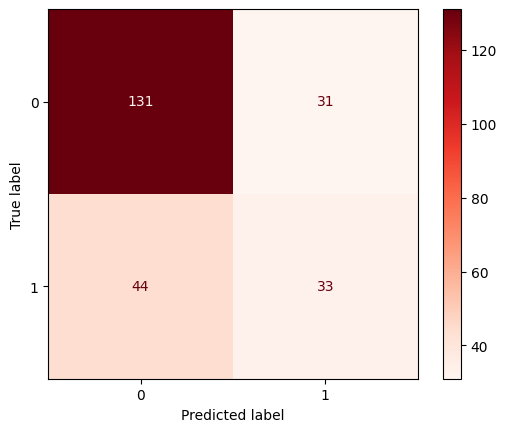

In [107]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'));

Confusion Matrix 


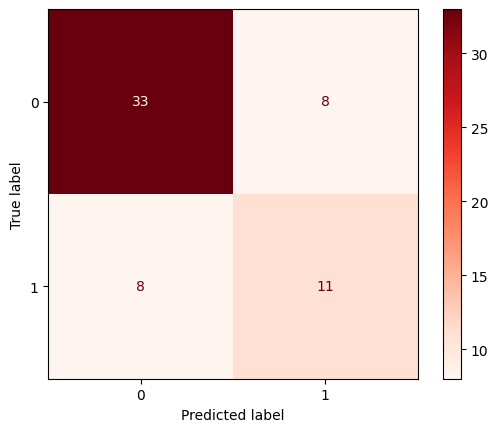

In [108]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final, y_test, cmap='Reds'));

In [64]:
# Predict Train-set and Test-set on Gradient Boost Classifier Model

y_pred_train_gb = gb.predict(X_train_final)
y_pred_test_gb  = gb.predict(X_test_final)

In [66]:
# Classification Report of Gradient Boost Classifier Model

print('Classification Report of Gradient Boost Classifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_gb))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_gb))


Classification Report of Gradient Boost Classifier Model

Train
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       162
           1       0.48      0.47      0.47        77

    accuracy                           0.67       239
   macro avg       0.61      0.61      0.61       239
weighted avg       0.66      0.67      0.66       239


Test
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.50      0.63      0.56        19

    accuracy                           0.68        60
   macro avg       0.65      0.67      0.66        60
weighted avg       0.71      0.68      0.69        60



Confusion Matrix 


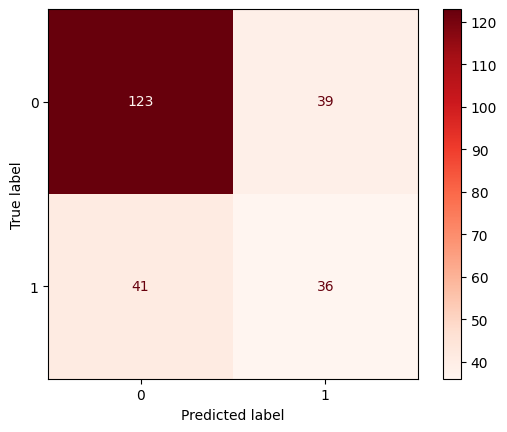

In [121]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(gb, X_train_final, y_train, cmap='Reds'));

Confusion Matrix 


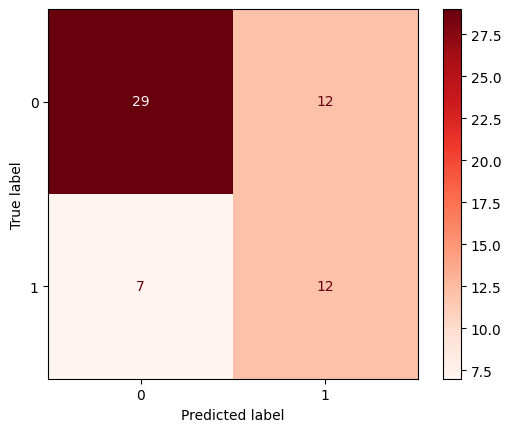

In [122]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(gb, X_test_final, y_test, cmap='Reds'));

#### VIII.I.II. With PCA

In [80]:
# Predict Train-set and Test-set on Random Forest Classifier Model

y_pred_train_rf = rf_pca.predict(X_train_final_pca)
y_pred_test_rf  = rf_pca.predict(X_test_final_pca)

In [81]:
# Classification Report of Random Forest Classifier Model

print('Classification Report of Random Forest Classifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_rf))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_rf))

Classification Report of Random Forest Classifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239


Test
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



Confusion Matrix 


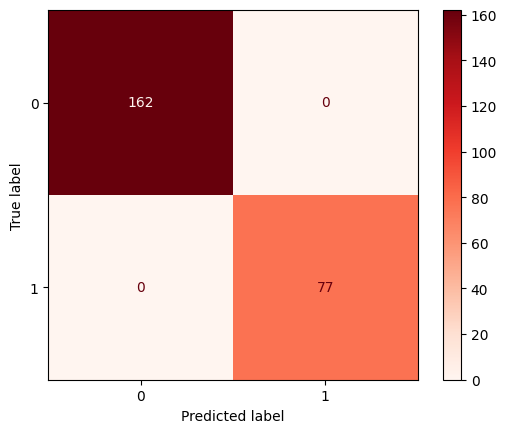

In [123]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(rf_pca, X_train_final_pca, y_train, cmap='Reds'));

Confusion Matrix 


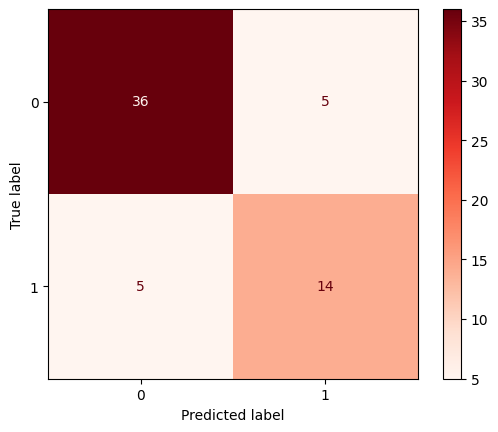

In [124]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(rf_pca, X_test_final_pca, y_test, cmap='Reds'));

In [84]:
# Predict Train-set and Test-set on Gradient Boost Classifier Model

y_pred_train_gb = gb_pca.predict(X_train_final_pca)
y_pred_test_gb  = gb_pca.predict(X_test_final_pca)

In [85]:
# Classification Report of Gradient Boost Classifier Model

print('Classification Report of Gradient Boost Classifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_gb))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_gb))

Classification Report of Gradient Boost Classifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239


Test
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.71      0.79      0.75        19

    accuracy                           0.83        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60



Confusion Matrix 


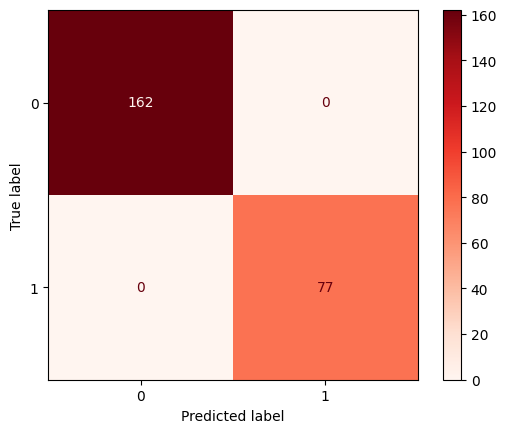

In [126]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(gb_pca, X_train_final_pca, y_train, cmap='Reds'));

Confusion Matrix 


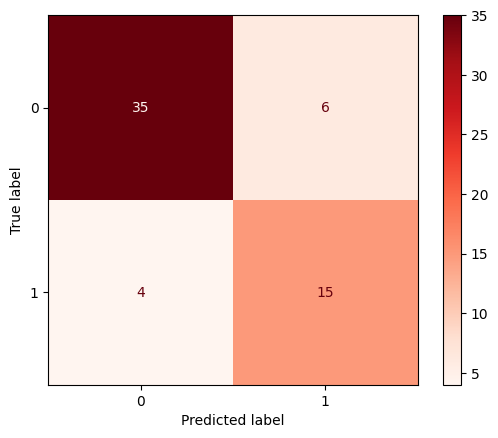

In [127]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(gb_pca, X_test_final_pca, y_test, cmap='Reds'));

#### VIII.I.III. Result Analysis

Based on the classification report results above, we can find out that in:

**Random Forest Classifier**

- Not using PCA:

1. On the training data, the model has an accuracy of about 69%, with an average F1-Score of 0.68. This shows that the model is able to classify the data with a reasonable balance between precision and recall.
2. However, on the test data, the model accuracy increased to about 73%, with an average F1-Score of 0.73. This may indicate that the model has a better ability to generalize beyond the training data.

- Using PCA:

1. The use of PCA here led to excellent performance on both training and test data, with accuracy and F1-Score reaching 100% for training data and 83% for test data.
2. There is a possibility of overcomplicating or overfitting the model on the training data, resulting in very high results on the training data but slightly lower performance on the testing data.


**GradientBoost Classifier**

- Does not use PCA:

1. This model has relatively lower performance compared to Random Forest. The accuracy on the training data was around 67%, with an average F1-Score of 0.66.
2. Although the performance on the test data was better than the training data, the accuracy and F1-Score only reached about 68% and 0.69, respectively. This suggests that the model may have problems in generalization.

- Using PCA:
1. As in Random Forest, the use of PCA here also resulted in excellent performance on both training and testing data, with accuracy and F1-Score reaching 100% for training data and 83% for testing data.
2. As before, there are indications of over-complexity or overfitting of the model on the training data.


**Conclusion**

- Using PCA significantly improves performance on training data, but can show signs of overfitting on testing data.
- The Random Forest model seems to be better at overfitting than GradientBoost, as the difference between training and testing data is not too large in Random Forest.

### VIII.II. Cross Validation Model Checking

#### VIII.II.I. Without PCA

In [73]:
# Cross Validation using `cross_val_score` - Random Forest Classifier

f1_score_train_cross_val = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10)

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.75       0.75       0.91666667 0.875      0.83333333 0.91666667
 0.875      0.875      0.83333333 0.82608696]
F1 Score - Mean - Cross Validation :  0.8451086956521738
F1 Score - Std - Cross Validation  :  0.056260136429453315
F1 Score - Range of Test-Set       :  0.7888485592227206 - 0.9013688320816271


In [75]:
# Cross Validation using `cross_val_score` - GradientBoost Classifier

f1_score_train_cross_val = cross_val_score(gb, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10)

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70833333 0.875      0.83333333 0.79166667 0.875      0.91666667
 0.875      0.91666667 0.83333333 0.82608696]
F1 Score - Mean - Cross Validation :  0.8451086956521738
F1 Score - Std - Cross Validation  :  0.059265716677375305
F1 Score - Range of Test-Set       :  0.7858429789747985 - 0.9043744123295492


#### VIII.II.II. With PCA

In [76]:
# Cross Validation using `cross_val_score` - Random Forest Classifier

f1_score_train_cross_val = cross_val_score(rf_pca, 
                                           X_train_final_pca, 
                                           y_train, 
                                           cv=10)

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70833333 0.66666667 0.83333333 0.66666667 0.83333333 0.875
 0.83333333 0.70833333 0.875      0.7826087 ]
F1 Score - Mean - Cross Validation :  0.7782608695652173
F1 Score - Std - Cross Validation  :  0.0790702244784712
F1 Score - Range of Test-Set       :  0.6991906450867461 - 0.8573310940436886


In [77]:
# Cross Validation using `cross_val_score` - GradientBoost Classifier

f1_score_train_cross_val = cross_val_score(gb_pca, 
                                            X_train_final_pca, 
                                            y_train, 
                                            cv=10)

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66666667 0.625      0.79166667 0.70833333 0.83333333 0.91666667
 0.79166667 0.75       0.875      0.7826087 ]
F1 Score - Mean - Cross Validation :  0.7740942028985507
F1 Score - Std - Cross Validation  :  0.0856638902332662
F1 Score - Range of Test-Set       :  0.6884303126652844 - 0.859758093131817


#### VIII.II.III. Result Analysis

Based on the cross validation results above, we can see that at:

**Random Forest Classifier**

- Does not use PCA:

1. Average F1 Score from cross validation: 0.8451
2. Standard deviation of F1 Score from cross validation: 0.0563
3. F1 Score range on the test set: 0.7888 to 0.9014
4. The high average F1 Score indicates that the Random Forest Classifier model without PCA does a pretty good job of classifying your data.
5. The low standard deviation indicates that the model has good consistency in performance on each fold of cross validation.

- Using PCA:

1. Average F1 Score from cross validation: 0.7783
2. Standard deviation of F1 Score from cross validation: 0.0791
3. F1 Score range on the test set: 0.6992 to 0.8573
4. The model with PCA has a slightly lower average F1 Score than without PCA.
5. Higher standard deviation indicates greater performance variation between cross validation folds.


**GradientBoost Classifier**

- Does not use PCA:

1. Average F1 Score from cross validation: 0.8451
2. Standard deviation of F1 Score from cross validation: 0.0593
3. F1 Score range on the test set: 0.7858 to 0.9044
4. As with Random Forest, the GradientBoost Classifier model without PCA also has a good average F1 Score.
5. The moderate standard deviation indicates good stability in the performance of this model.

- Using PCA:
1. Average F1 Score from cross validation: 0.7741
2. Standard deviation of F1 Score from cross validation: 0.0857
3. F1 Score range on the test set: 0.6884 to 0.8598
4. The model with PCA had a lower average F1 Score than without PCA, suggesting that in this context, PCA may not provide significant benefits.

### VIII.III. Hyperparameter Tuning

#### VIII.III.I. Hyperparameter Tuning - Random Forest Classifier

In this step, I will perform hyperparameter tuning with the best Random Forest Classifier model results based on the cross validation results above.

In this situation, the model without PCA has a slight advantage in average F1 Score. Both models have relatively similar performance. However, based on the average F1 Score, the model without PCA has a slightly higher average F1 Score (0.845 vs 0.778) and the standard deviation in the model with PCA is higher, this difference may not be significant.

In [96]:
# Define Hyperparameters

param_grid_rf = {'n_estimators'     : [10, 50, 100, 150, 200],
                'max_depth'         : [2, 4, 6, 8, 10, 12],
                'criterion'         : ['gini','entropy'],
                'random_state'      : [50]}

In [98]:
# Train with Grid Search

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf
                        )

grid_rf.fit(X_train_num_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'random_state': [50]})

In [99]:
# Print best parameter after tuning
print(grid_rf.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100, 'random_state': 50}
RandomForestClassifier(max_depth=8, random_state=50)


In [102]:
# Predict using selected hyper-parameter
grid_pred_test_rf = grid_rf.predict(X_train_final)

# Print classification report
print(classification_report(y_train, grid_pred_test_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       162
           1       1.00      0.94      0.97        77

    accuracy                           0.98       239
   macro avg       0.99      0.97      0.98       239
weighted avg       0.98      0.98      0.98       239



Confusion Matrix 


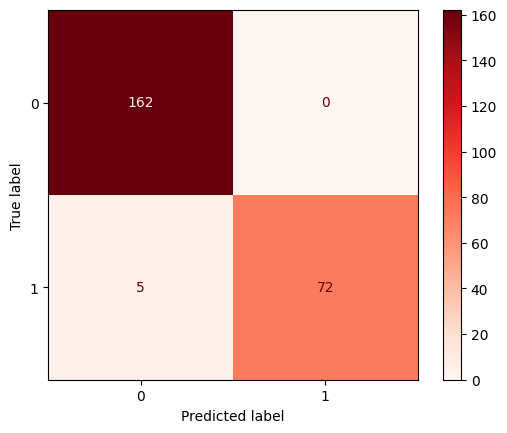

In [105]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_rf, X_train_final, y_train, cmap='Reds'));

In [103]:
# Predict using selected hyper-parameter

grid_pred_test_rf = grid_rf.predict(X_test_final)

# Print classification report

print(classification_report(y_test, grid_pred_test_rf))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.71      0.79      0.75        19

    accuracy                           0.83        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60



Confusion Matrix 


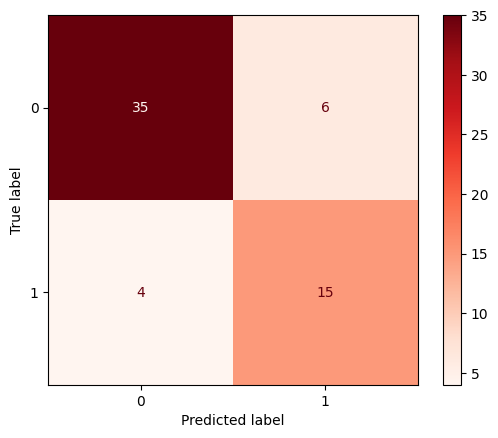

In [106]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_rf, X_test_final, y_test, cmap='Reds'));

In [128]:
# Prediction Checking

eval_pred_rfc = pd.DataFrame({
    'actual': y_test,
    'pred_rf': y_pred_test_rf,
    'grid_pred_rf': grid_pred_test_rf
})
eval_pred_rfc.tail(10)

actual  pred_rf  grid_pred_rf
102       1        1             1
294       0        0             0
29        0        0             0
129       0        0             1
160       1        0             0
0         1        1             1
221       0        0             0
24        1        0             0
270       0        1             1
122       1        1             1

#### VIII.III.II. Hyperparameter Tuning - GradientBoost Classifier

In this step, I will perform hyperparameter tuning with the best AdaBoost Classifier model results based on the cross validation results above.

In this case, I chose to perform hyperparameter tuning on the GradientBoost Classifier model without PCA because the performance of the model without PCA (0.845 average F1 Score) has a slightly higher average F1 Score value than the model with PCA (0.774 average F1 Score) and the standard deviation of GradientBoost without PCA is lower than the standard deviation of the model with PCA.

In [113]:
# Define Hyperparameters

param_grid_gb = {'n_estimators'     : [5, 10, 50, 100, 250, 300, 350, 400],
                'learning_rate'     : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
                'max_depth'         : [1, 3, 5, 7, 9],
                'random_state'      : [50]}

In [114]:
# Train with Grid Search

grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=param_grid_gb)

grid_gb.fit(X_train_final, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                           1.0],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 50, 100, 250, 300, 350, 400],
                         'random_state': [50]})

In [115]:
# Print best parameter after tuning
print(grid_gb.best_params_)
# Print how our model looks after hyper-parameter tuning
print(grid_gb.best_estimator_)

{'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 10, 'random_state': 50}
GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=10,
                           random_state=50)


In [117]:
# Predict using selected hyper-parameter
grid_pred_train_gb = grid_gb.predict(X_train_final)

# Print classification report
print(classification_report(y_train, grid_pred_train_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



Confusion Matrix 


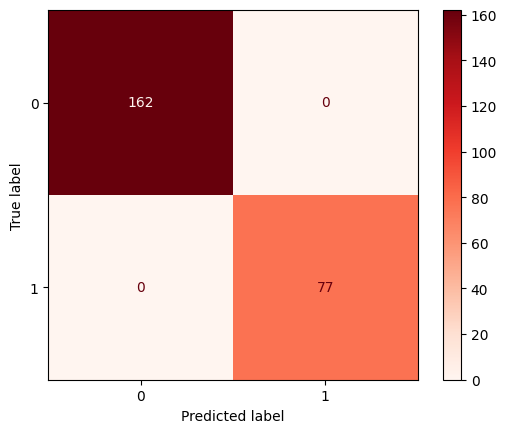

In [119]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_gb, X_train_final, y_train, cmap='Reds'));

In [118]:
# Predict using selected hyper-parameter
grid_pred_test_gb = grid_gb.predict(X_test_final)
# Print classification report
print(classification_report(y_test, grid_pred_test_gb))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.71      0.89      0.79        19

    accuracy                           0.85        60
   macro avg       0.83      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60



Confusion Matrix 


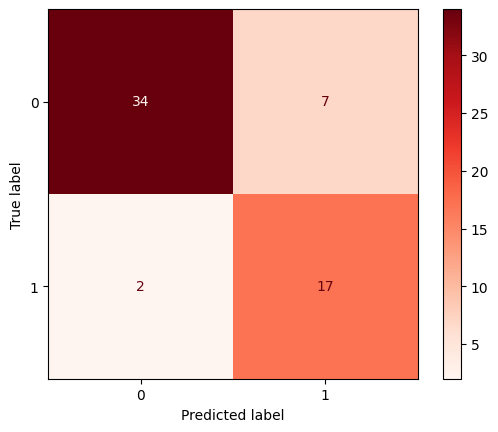

In [120]:
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_gb, X_test_final, y_test, cmap='Reds'));

In [129]:
# Prediction Checking

eval_pred_gb = pd.DataFrame({
    'actual': y_test,
    'pred_rf': y_pred_test_gb,
    'grid_pred_rf': grid_pred_test_gb
})
eval_pred_gb.tail(10)

actual  pred_rf  grid_pred_rf
102       1        1             1
294       0        0             0
29        0        0             0
129       0        0             1
160       1        0             1
0         1        1             1
221       0        0             0
24        1        0             0
270       0        1             1
122       1        1             1

#### VIII.III.III. Result Analysis

Here are some insights that can be drawn from the test results given for the Random Forest Classifier and GradientBoost Classifier models before and after hyperparameter tuning using GridSearchCV:

**Random Forest Classifier**

- Before Hyperparameter Tuning:

1. Train Set: The model has an accuracy of about 0.69, with higher precision for class 0 and better recall for class 1. F1-score for class 0 is higher than class 1.
2. Test Set: The model accuracy is about 0.73. Again, the precision for class 0 is higher, while the recall is better for class 1. The F1-score performance for both classes still looks balanced.

- After Hyperparameter Tuning:

1. Train Set: After hyperparameter tuning, the model has a very high accuracy (around 0.98). The model achieves perfect precision and recall for both classes, which results in a very high F1-score.
2. Test Set: The model accuracy dropped slightly to about 0.83 after hyperparameter tuning. The model still performed well with high precision for class 0 and better recall for class 1. The F1-score also remained high.

**GradientBoost Classifier**

- Before Hyperparameter Tuning:

1. Train Set: The model has an accuracy of about 0.67, with higher precision for class 0 and better recall for class 1. However, the F1-score performance for both classes is not optimal.
2. Test Set: The model accuracy is about 0.68. Same as above, precision is better for class 0 and recall is better for class 1. F1-score still has potential improvements.

- After Hyperparameter Tuning:

1. Train Set: After hyperparameter tuning, the model has perfect accuracy (1.00) in the training set. Precision and recall are also perfect for both classes, resulting in a high F1-score.
2. Test Set: The model accuracy increased to about 0.85 after hyperparameter tuning. The model still had good precision for class 0 and better recall for class 1. The F1-score also improved, although there was still room for improvement.

## IX. Model Saving

In [130]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_rfc.pkl', 'wb') as file_3:
  pickle.dump(rf, file_3)
  
with open('model_gbc.pkl', 'wb') as file_4:
  pickle.dump(gb, file_4)

## X. Model Inference

This step can be seen in : h8dsft_P1G3_THEO_INF.ipynb

## XI. Conclusion

- The model without PCA had a better average F1 Score in both cases (Random Forest and GradientBoost).
- Models without PCA also tend to have lower variation in performance.
- Hyperparameter tuning significantly improves the performance of both models on the training set, but on some metrics, the performance on the testing set may slightly decrease after tuning. This indicates potential overfitting after tuning.
- The Random Forest Classifier model performed better after tuning than the GradientBoost Classifier model, especially in terms of class 1 accuracy and precision.
- Despite the hyperparameter tuning, the performance on the test set still varies between class 0 and class 1, indicating an imbalance in the dataset. Further improvements may be needed to address this imbalance.

## Conceptual Problems

1. Explain the background of bagging and how bagging works!

**Background of Bagging**:

- Bagging, which stands for Bootstrap Aggregating, is one of the ensemble learning techniques used in machine learning. Ensemble learning involves combining results from multiple learning models to improve prediction performance. Bagging was developed to address the problem of overfitting that often occurs in complex single learning models.

- Overfitting occurs when the learning model is too complex and can "memorize" the training data, but performs poorly on data it has never seen before (test data). Bagging aims to reduce its variance and improve prediction performance by combining multiple models that may differ or have lower variance.

**How Bagging Works**:

- Bootstrap Sampling: Bagging starts by generating a number of new datasets obtained by bootstrap sampling method. Bootstrap sampling involves random sampling with replacement from the original training dataset. This means some data may appear more than once in a bootstrap set, while some data may not appear at all. This step creates variation in the new dataset that will be used to train the models in the ensemble.

- Model Base: Each bootstrap dataset is used to train the same or similar learning model, but on each different dataset. This model is known as the base model or base classifier. It can be a decision tree, linear regression, SVM, or any other type of model.

- Aggregation Prediction: After the base models are trained on different bootstrap datasets, individual predictions of each base model are generated on never-before-seen test data. These predictions are then aggregated to produce the final prediction. Typically, in the case of classification, majority voting is used (e.g., through majority voting), whereas in the case of regression, the average of the predictions of the base models is used.

- Reducing Variance: One of the main advantages of bagging is that through bootstrapping methods and merging of prediction results, the variance tends to be reduced. Lower variance leads to a more stable ensemble model and better performance on test data that has never been seen.

- Prevents Overfitting: Bagging also helps reduce the risk of overfitting as different base models will tend to have lower variance. This reduces the likelihood that one overly complex and overfit model will dominate the ensemble results.

In conclusion, bagging is an ensemble learning technique that is effective in reducing overfitting and improving prediction performance by combining results from multiple models trained on different bootstrap datasets.

---

2. Explain the difference between the Random Forest algorithm and your chosen boosting algorithm!

**Random Forest**:

- Approach: Random Forest is an aggregation-based ensemble learning. This means it combines predictions from multiple base models to produce the final prediction.
- Model Building Process: RF uses a large number of independently created decision trees.
- Bootstrap Sampling: Each tree in RF is created using a bootstrap sampling technique. Each tree is trained on a random subset of training data taken from the original dataset with replacement.
- Feature Selection: At each tree generation, only a random subset of features are selected to be used in dividing the nodes in the tree. This helps reduce the correlation between the trees in the ensemble.
- Final Prediction: The final prediction of Random Forest is obtained by aggregating the prediction results from all the trees and using majority vote (in case of classification) or average (in case of regression).

**Boosting**:

- Approach: Boosting is an adaptation-based ensemble learning. This means the model-base is generated sequentially, where each model tries to correct the error of the previous model.
- Model Generation Process: Boosting involves creating model-bases that depend on each other sequentially.
- Emphasis on Difficult Data: Data that is difficult to recognize by the previous model is given a higher weight, so that subsequent models focus more on those difficult cases.
- Error Correction: Each model-base is focused on reducing the errors made by the previous model. This is achieved by giving higher weights to data that was misrecognized by the previous model.
- Weight Adjustment: After each iteration, the weights of the data are changed so that the misrecognized data has a greater influence on subsequent model building.
- Final Prediction: The final prediction of Boosting is obtained by combining the prediction results of all the base models, by assigning weights to each base model according to their performance.

In conclusion, the fundamental difference between Random Forest and Boosting is that Random Forest uses many independent decision trees with random feature retrieval, while Boosting generates model-bases adaptively with a focus on difficult cases and error correction from previous models.